# DATA WRANGLING FOR TANZANIAN TOURISM ANALYSIS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.2f}'.format

In [4]:
tourists_df = pd.read_csv('datasets/Tanzania_Tourism_datasets.csv')

### Step 1: Data Description and Basic Stats

In [5]:
tourists_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.00,0.00,Cash,No,Friendly People,674602.50
1,tour_10,UNITED KINGDOM,25-44,NaN,1.00,0.00,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.00,7.00,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.50
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.00,1.00,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.00,31.00,Cash,No,Excellent Experience,3315000.00
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.00,0.00,Cash,Yes,Friendly People,7790250.00
4,tour_1004,CHINA,1-24,NaN,1.00,0.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.00,4.00,Cash,Yes,No comments,1657500.00


In [6]:
tourists_df.shape

(4809, 23)

In [7]:
tourists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [8]:
tourists_df.describe(include='all')

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
count,4809,4809,4809,3695,4806.00,4804.00,4809,4809,4809,4809,...,4809,4809,4809,4809,4809.00,4809.00,4809,4809,4496,4809.00
unique,4809,105,4,5,NaN,NaN,7,9,8,2,...,2,2,2,2,NaN,NaN,4,2,7,NaN
top,tour_0,UNITED STATES OF AMERICA,25-44,Alone,NaN,NaN,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,NaN,NaN,Cash,Yes,Friendly People,NaN
freq,1,695,2487,1265,NaN,NaN,2840,2259,1913,2570,...,2919,3319,3259,4079,NaN,NaN,4172,3243,1541,NaN
mean,NaN,NaN,NaN,NaN,0.93,1.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.49,2.30,NaN,NaN,NaN,8114388.78
std,NaN,NaN,NaN,NaN,1.29,1.14,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.43,4.23,NaN,NaN,NaN,12224903.25
min,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,49000.00
25%,NaN,NaN,NaN,NaN,0.00,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.00,0.00,NaN,NaN,NaN,812175.00
50%,NaN,NaN,NaN,NaN,1.00,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.00,0.00,NaN,NaN,NaN,3397875.00
75%,NaN,NaN,NaN,NaN,1.00,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.00,4.00,NaN,NaN,NaN,9945000.00


In [9]:
tourists_df.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

### Step 2: Data Cleaning
From the column analysis there are missing values on the travel_with, total_female, total_male and most_impressing columns. This section is to fill in the missing values, remove duplicates and clean any anomalies that we identify

#### 2.1 Fill in missing total male and female values

In [10]:
tourists_df[tourists_df.total_female.isnull()] = 0

In [11]:
tourists_df[tourists_df.total_male.isnull()] = 0

In [12]:
#Since travelers can only be a minimum of 1 person, the total_female and total_male value needs to be greater than zero if the specific traveler stayed in the country and did some activity. In our case we need to clean row 1453
tourists_df[(tourists_df.total_female == 0) & (tourists_df.total_male == 0)]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
170,tour_1205,UNITED STATES OF AMERICA,25-44,Spouse,0.00,0.00,Leisure and Holidays,Wildlife tourism,"Radio, TV, Web",Package Tour,...,Yes,No,Yes,No,5.00,4.00,Credit Card,No,Excellent Experience,1657500.00
490,0,0,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0.00
545,0,0,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0.00
705,tour_1867,HUNGARY,45-64,Spouse and Children,0.00,0.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,4.00,0.00,Cash,Yes,Wildlife,7646047.50
706,tour_1869,UNITED STATES OF AMERICA,45-64,NaN,0.00,0.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,Yes,Yes,7.00,0.00,Cash,Yes,No comments,21713250.00
727,tour_1893,UNITED STATES OF AMERICA,45-64,Spouse and Children,0.00,0.00,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,20.00,0.00,Cash,Yes,Friendly People,19227000.00
1017,0,0,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0.00
1154,tour_2414,GERMANY,45-64,Friends/Relatives,0.00,0.00,Leisure and Holidays,Beach tourism,"Newspaper, magazines,brochures",Package Tour,...,Yes,No,No,No,0.00,33.00,Cash,Yes,Wildlife,67399101.00
1261,0,0,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0.00
1473,0,0,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0.00


In [13]:
tourists_df.loc[804, 'total_male'] = 3
tourists_df.loc[804, 'total_female'] = 5
tourists_df.loc[1453, 'total_female'] = 1

#### 2.2 Fill in missing travel with values

In [14]:
missing_travel_companions = tourists_df[tourists_df.travel_with.isnull()]

In [15]:
missing_travel_companions.travel_with.isnull().sum()

np.int64(1113)

In [16]:
single_travelers = missing_travel_companions[(missing_travel_companions.travel_with.isnull()) & (missing_travel_companions.total_female == 1) | (missing_travel_companions.total_male == 1)]

In [17]:
single_travelers.travel_with = single_travelers.travel_with.fillna('Alone')

/var/folders/mk/pdjmq76j5h1b0nv4v9ys81cr0000gn/T/ipykernel_25859/548512947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_travelers.travel_with = single_travelers.travel_with.fillna('Alone')


In [18]:
single_travelers.travel_with.isnull().sum()

np.int64(0)

In [19]:
#tourists_df.travel_with.fillna(single_travelers.travel_with, inplace=True)
tourists_df.travel_with = tourists_df.travel_with.fillna(single_travelers.travel_with)

In [20]:
tourists_df.travel_with.isnull().sum()

np.int64(13)

In [21]:
# Find the unique travel_with values needed to clean our data where there are missing values
tourists_df.travel_with.unique()

array(['Friends/Relatives', 'Alone', 'Spouse', 'Children',
       'Spouse and Children', 0, nan], dtype=object)

In [22]:
tourists_df[tourists_df.travel_with.isnull()]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
681,tour_1837,UNITED STATES OF AMERICA,1-24,NaN,0.00,4.00,Leisure and Holidays,Conference tourism,"Radio, TV, Web",Package Tour,...,Yes,No,Yes,No,10.00,0.00,Cash,Yes,No comments,4309500.00
706,tour_1869,UNITED STATES OF AMERICA,45-64,NaN,0.00,0.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,Yes,Yes,7.00,0.00,Cash,Yes,No comments,21713250.00
717,tour_1881,UNITED STATES OF AMERICA,45-64,NaN,7.00,2.00,Scientific and Academic,Wildlife tourism,"Newspaper, magazines,brochures",Package Tour,...,Yes,Yes,Yes,No,14.00,0.00,Cash,Yes,Friendly People,8038875.00
1149,tour_2409,GERMANY,25-44,NaN,2.00,5.00,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,14.00,0.00,Cash,Yes,Friendly People,8287500.00
1447,tour_2775,UNITED KINGDOM,45-64,NaN,2.00,0.00,Meetings and Conference,Wildlife tourism,others,Independent,...,No,No,No,No,1.00,0.00,Credit Card,No,Friendly People,497250.00
1672,tour_3042,ITALY,45-64,NaN,0.00,4.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,No,No,4.00,6.00,Cash,Yes,Excellent Experience,340399.50
1732,tour_3111,KENYA,1-24,NaN,11.00,0.00,Visiting Friends and Relatives,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.00,0.00,Cash,Yes,NaN,547404.00
1734,tour_3113,SOUTH AFRICA,25-44,NaN,5.00,0.00,Leisure and Holidays,Beach tourism,"Travel, agent, tour operator",Package Tour,...,No,No,Yes,No,0.00,4.00,Cash,Yes,Friendly People,20086614.94
2440,tour_3972,GERMANY,1-24,NaN,2.00,2.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,5.00,0.00,Cash,Yes,Friendly People,23453625.00
3063,tour_4715,SPAIN,1-24,NaN,2.00,0.00,Volunteering,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,30.00,0.00,Cash,Yes,NaN,8536125.00


In [23]:
tourists_df[tourists_df.travel_with == 0]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
490,0,0,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0.00
545,0,0,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0.00
1017,0,0,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0.00
1261,0,0,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0.00
1473,0,0,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0.00
2449,0,0,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0.00
2494,0,0,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0.00
3984,0,0,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0.00


In [24]:
#Drop the row with zero values
tourists_df.drop(tourists_df[tourists_df.travel_with == 0].index, inplace=True)

In [25]:
#Get travel_with missing value indices
missing_total_with_indices = tourists_df.index[tourists_df.travel_with.isnull()].tolist()

In [26]:
missing_total_with_indices

[681, 706, 717, 1149, 1447, 1672, 1732, 1734, 2440, 3063, 3412, 4414, 4694]

In [27]:
#Add value travel as group and to missing values
tourists_df.loc[missing_total_with_indices, 'travel_with'] = 'Travel as group'

In [28]:
tourists_df[tourists_df.travel_with == 'Travel as group']

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
681,tour_1837,UNITED STATES OF AMERICA,1-24,Travel as group,0.00,4.00,Leisure and Holidays,Conference tourism,"Radio, TV, Web",Package Tour,...,Yes,No,Yes,No,10.00,0.00,Cash,Yes,No comments,4309500.00
706,tour_1869,UNITED STATES OF AMERICA,45-64,Travel as group,0.00,0.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,Yes,Yes,7.00,0.00,Cash,Yes,No comments,21713250.00
717,tour_1881,UNITED STATES OF AMERICA,45-64,Travel as group,7.00,2.00,Scientific and Academic,Wildlife tourism,"Newspaper, magazines,brochures",Package Tour,...,Yes,Yes,Yes,No,14.00,0.00,Cash,Yes,Friendly People,8038875.00
1149,tour_2409,GERMANY,25-44,Travel as group,2.00,5.00,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,14.00,0.00,Cash,Yes,Friendly People,8287500.00
1447,tour_2775,UNITED KINGDOM,45-64,Travel as group,2.00,0.00,Meetings and Conference,Wildlife tourism,others,Independent,...,No,No,No,No,1.00,0.00,Credit Card,No,Friendly People,497250.00
1672,tour_3042,ITALY,45-64,Travel as group,0.00,4.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,No,No,4.00,6.00,Cash,Yes,Excellent Experience,340399.50
1732,tour_3111,KENYA,1-24,Travel as group,11.00,0.00,Visiting Friends and Relatives,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.00,0.00,Cash,Yes,NaN,547404.00
1734,tour_3113,SOUTH AFRICA,25-44,Travel as group,5.00,0.00,Leisure and Holidays,Beach tourism,"Travel, agent, tour operator",Package Tour,...,No,No,Yes,No,0.00,4.00,Cash,Yes,Friendly People,20086614.94
2440,tour_3972,GERMANY,1-24,Travel as group,2.00,2.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,5.00,0.00,Cash,Yes,Friendly People,23453625.00
3063,tour_4715,SPAIN,1-24,Travel as group,2.00,0.00,Volunteering,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,30.00,0.00,Cash,Yes,NaN,8536125.00


In [29]:
tourists_df.loc[1453, 'travel_with'] = 'Alone'

#### 2.3 Fill in missing most_impressing values

In [30]:
tourists_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.00,0.00,Cash,No,Friendly People,674602.50
1,tour_10,UNITED KINGDOM,25-44,Alone,1.00,0.00,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.00,7.00,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.50
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.00,1.00,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.00,31.00,Cash,No,Excellent Experience,3315000.00
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.00,0.00,Cash,Yes,Friendly People,7790250.00
4,tour_1004,CHINA,1-24,Alone,1.00,0.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.00,4.00,Cash,Yes,No comments,1657500.00


In [31]:
tourists_df.most_impressing.unique()

array(['Friendly People', 'Wonderful Country, Landscape, Nature',
       'Excellent Experience', 'No comments', ' Wildlife', nan,
       'Good service', 'Satisfies and Hope Come Back'], dtype=object)

In [32]:
tourists_df.most_impressing.isnull().sum()

np.int64(312)

In [33]:
tourists_df.most_impressing = tourists_df.most_impressing.fillna('No comments')

#### 2.4 Check and drop duplicates

In [34]:
tourists_df.duplicated().sum()

np.int64(0)

In [35]:
tourists_df.drop(tourists_df[tourists_df.duplicated()].index, inplace=True)

In [36]:
tourists_df[tourists_df.duplicated()]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost


In [37]:
tourists_df.tail()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4804,tour_993,UAE,45-64,Alone,0.00,1.00,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.00,0.00,Credit Card,No,No comments,3315000.00
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.00,0.00,Cash,Yes,Friendly People,10690875.00
4806,tour_995,NETHERLANDS,1-24,Alone,1.00,0.00,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.00,7.00,Cash,Yes,Good service,2246636.70
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.00,1.00,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.00,0.00,Credit Card,No,Friendly People,1160250.00
4808,tour_999,UNITED KINGDOM,25-44,Spouse,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,4.00,7.00,Cash,Yes,Friendly People,13260000.00


### Step 3: Data Exploration

In [38]:
tourists_df

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.00,0.00,Cash,No,Friendly People,674602.50
1,tour_10,UNITED KINGDOM,25-44,Alone,1.00,0.00,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.00,7.00,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.50
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.00,1.00,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.00,31.00,Cash,No,Excellent Experience,3315000.00
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.00,0.00,Cash,Yes,Friendly People,7790250.00
4,tour_1004,CHINA,1-24,Alone,1.00,0.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.00,4.00,Cash,Yes,No comments,1657500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,tour_993,UAE,45-64,Alone,0.00,1.00,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.00,0.00,Credit Card,No,No comments,3315000.00
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.00,0.00,Cash,Yes,Friendly People,10690875.00
4806,tour_995,NETHERLANDS,1-24,Alone,1.00,0.00,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.00,7.00,Cash,Yes,Good service,2246636.70
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.00,1.00,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.00,0.00,Credit Card,No,Friendly People,1160250.00


In [39]:
tourists_df.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

#### 3.1 Calculate summary statistics for numerical columns (mean, median, mode, etc).

In [40]:
#mean of numerical columns using robust way of adding the column ways
tourists_df[['total_female', 'total_male', 'night_mainland', 'night_zanzibar']].mean()

total_female     0.92
total_male       1.01
night_mainland   8.49
night_zanzibar   2.31
dtype: float64

In [41]:
#mean using an automatic detection
tourists_df.select_dtypes(include=np.number).mean()

total_female           0.92
total_male             1.01
night_mainland         8.49
night_zanzibar         2.31
total_cost       8092134.00
dtype: float64

In [42]:
#median of numerical columns
tourists_df.select_dtypes(include=np.number).median()

total_female           1.00
total_male             1.00
night_mainland         6.00
night_zanzibar         0.00
total_cost       3364725.00
dtype: float64

In [43]:
#mode of numerical columns
tourists_df.select_dtypes(include=np.number).mode()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
0,1.00,1.00,0.00,0.00,1657500.00


#### 3.2 Find the correlation between columns and create a heatmap

Correlation analysis is a statistical method used to evaluate the strength and direction between 2 or more variables

In [44]:
corr_matrix = tourists_df.select_dtypes(include=np.number).corr()[['total_female','total_male','night_mainland', 'night_zanzibar']]
corr_matrix

,total_female,total_male,night_mainland,night_zanzibar
total_female,1.00,0.47,0.03,0.14
total_male,0.47,1.00,-0.04,0.05
night_mainland,0.03,-0.04,1.00,-0.12
night_zanzibar,0.14,0.05,-0.12,1.00
total_cost,0.28,0.19,0.02,0.15


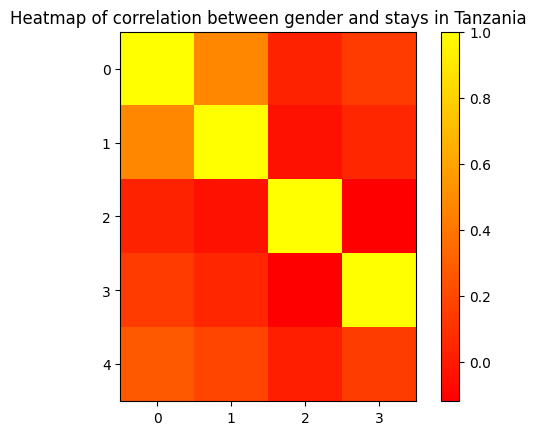

In [45]:
plt.imshow(corr_matrix, cmap='autumn') 
  
# Add colorbar 
plt.colorbar() 
  
plt.title("Heatmap of correlation between gender and stays in Tanzania") 
plt.show()

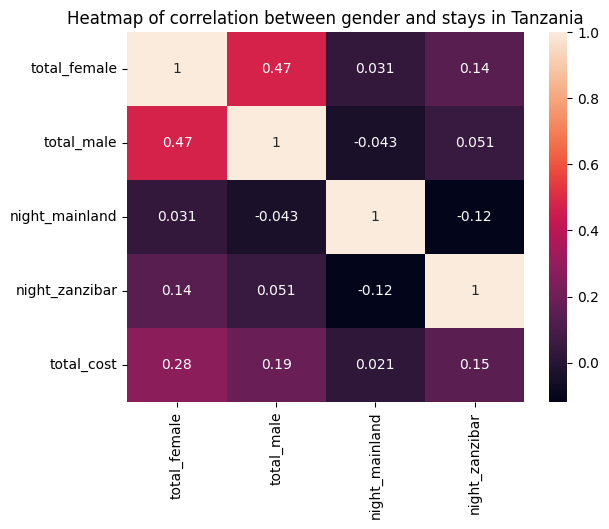

In [46]:
# plotting the heatmap 
sns.heatmap(data=corr_matrix, annot=True)
plt.title("Heatmap of correlation between gender and stays in Tanzania")
#showing the heatmap
plt.show()

#### 3.3 Find the 3 most frequent countries that visitors tend to come from.

In [47]:
tourists_df.sample(10)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
3208,tour_4884,FRANCE,45-64,Spouse,1.00,1.00,Leisure and Holidays,Cultural tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,12.00,12.00,Cash,Yes,Wildlife,4143750.00
473,tour_1582,UGANDA,65+,Spouse,1.00,1.00,Leisure and Holidays,Wildlife tourism,others,Package Tour,...,Yes,Yes,Yes,Yes,13.00,0.00,Cash,Yes,Friendly People,13260000.00
1107,tour_2360,AUSTRALIA,45-64,Spouse and Children,2.00,1.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,5.00,4.00,Cash,Yes,Wildlife,20138625.00
3156,tour_4817,UNITED KINGDOM,25-44,Alone,1.00,0.00,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,9.00,4.00,Cash,No,Friendly People,1657500.00
851,tour_2046,ISRAEL,45-64,Spouse and Children,2.00,2.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,7.00,0.00,Cash,Yes,Wildlife,45581250.00
3383,tour_5089,ZIMBABWE,25-44,Alone,0.00,1.00,Business,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,4.00,0.00,Cash,No,Friendly People,828750.00
457,tour_1563,UNITED STATES OF AMERICA,45-64,Spouse,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,9.00,2.00,Cash,Yes,Wildlife,5469750.00
1337,tour_2646,SOUTH AFRICA,25-44,Alone,0.00,1.00,Meetings and Conference,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,6.00,0.00,Cash,No,"Wonderful Country, Landscape, Nature",1657500.00
122,tour_1149,KENYA,25-44,Friends/Relatives,5.00,5.00,Meetings and Conference,Beach tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,10.00,0.00,Cash,No,Wildlife,2060000.00
2661,tour_425,SPAIN,45-64,Friends/Relatives,0.00,0.00,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,5.00,6.00,Cash,Yes,Friendly People,19755742.50


In [48]:
total_num_tourists = tourists_df.total_female + tourists_df.total_male
tourists_df['total_tourists'] = total_num_tourists

In [49]:
tourists_frequent_countries = tourists_df.groupby('country')['total_tourists'].sum()
tourists_frequent_countries.sort_values(ascending=False).reset_index(name='total tourists').head(3)

,country,total tourists
0,UNITED STATES OF AMERICA,1356.00
1,UNITED KINGDOM,991.00
2,ITALY,945.00


#### 3.4 Determine the most common purpose of the visit by 'age_group'.

In [50]:
travel_purposes = tourists_df.purpose.unique()
travel_purposes

array(['Leisure and Holidays', 'Visiting Friends and Relatives',
       'Business', 'Meetings and Conference', 'Volunteering',
       'Scientific and Academic', 'Other'], dtype=object)

In [51]:
travel_age_groups = tourists_df.age_group.unique()
travel_age_groups

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

In [52]:
tourists_df.groupby('age_group')['purpose'].unique().reset_index(name='travel_purpose')

,age_group,travel_purpose
0,1-24,"[Leisure and Holidays, Volunteering, Scientifi..."
1,25-44,"[Leisure and Holidays, Visiting Friends and Re..."
2,45-64,"[Leisure and Holidays, Business, Visiting Frie..."
3,65+,"[Leisure and Holidays, Visiting Friends and Re..."


#### 3.5 Analyse the data distribution of 'total_cost' column with respect to several criteria : Country, age_group, purpose

In [53]:
#Total costs based on country
total_costs_per_country = tourists_df.groupby('country')['total_cost'].sum().sort_values(ascending=False).reset_index(name='total_cost (TZS)')
total_costs_per_country

,country,total_cost (TZS)
0,UNITED STATES OF AMERICA,8883539053.70
1,UNITED KINGDOM,3808382502.97
2,ITALY,3753082955.59
3,FRANCE,3339549148.43
4,AUSTRALIA,2743131959.45
...,...,...
100,MYANMAR,331500.00
101,BERMUDA,200000.00
102,MADAGASCAR,194550.00
103,URUGUAY,165750.00


<Figure size 800x500 with 0 Axes>

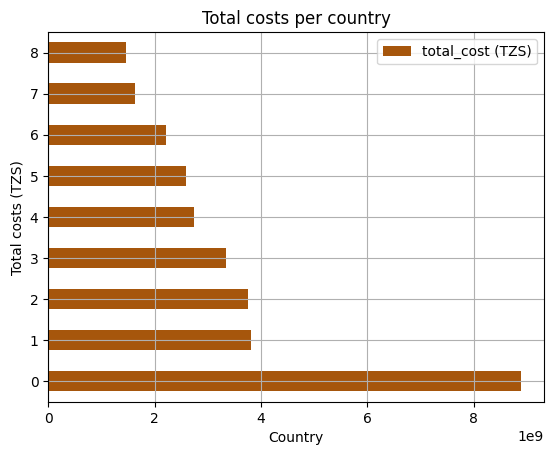

In [74]:
plt.figure(figsize=(8,5))
total_costs_per_country.loc[:8].plot(kind='barh', color='#a6560c')
plt.title('Total costs per country')
plt.xlabel('Country')
plt.ylabel('Total costs (TZS)')
plt.grid()
plt.show()

In [55]:
#Total costs based on age group
total_costs_per_agegroup = tourists_df.groupby('age_group')['total_cost'].sum().sort_values().reset_index(name='total_cost (TZS)')
total_costs_per_agegroup

,age_group,total_cost (TZS)
0,1-24,3370010830.10
1,65+,5284068283.60
2,25-44,14888670138.00
3,45-64,15307586076.87


<Figure size 800x500 with 0 Axes>

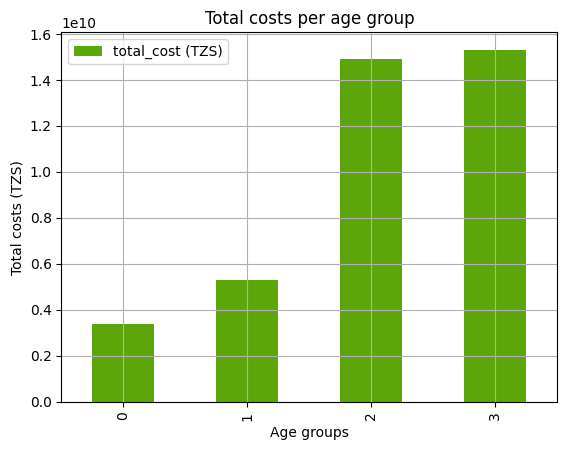

In [56]:
plt.figure(figsize=(8,5))
total_costs_per_agegroup.plot(kind='bar', color=['#5ca60c', '#a6560c', '#0c5ca6', '#560ca6'])
plt.title('Total costs per age group')
plt.xlabel('Age groups')
plt.ylabel('Total costs (TZS)')
plt.grid()
plt.show()

In [57]:
#Total costs based on purpose
total_costs_per_purpose = tourists_df.groupby('purpose')['total_cost'].sum().sort_values(ascending=False).reset_index(name='total_cost (TZS)')
total_costs_per_purpose

,purpose,total_cost (TZS)
0,Leisure and Holidays,33839479946.93
1,Visiting Friends and Relatives,2019760962.05
2,Business,1196015965.85
3,Meetings and Conference,761359095.09
4,Volunteering,536100610.12
5,Scientific and Academic,350783147.62
6,Other,146835600.90


In [58]:
total_costs_per_purpose.purpose

0              Leisure and Holidays
1    Visiting Friends and Relatives
2                          Business
3           Meetings and Conference
4                      Volunteering
5           Scientific and Academic
6                             Other
Name: purpose, dtype: object

<Figure size 1800x1500 with 0 Axes>

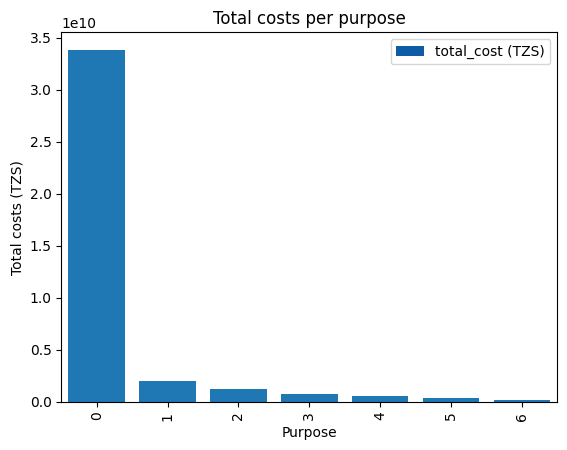

In [59]:
plt.figure(figsize=(18,15))
total_costs_per_purpose.plot(kind='bar', color='#0c5ca6')
plt.bar(total_costs_per_purpose.purpose, total_costs_per_purpose['total_cost (TZS)'])
plt.title('Total costs per purpose')
plt.xlabel('Purpose')
plt.ylabel('Total costs (TZS)')
plt.show()